### Move to working Directory
- C:\Users\SEOYOON_MOON\Desktop\ConnectomeLab\connectome_data\glm_gps_mor: p value 있는 folder
- C:\Users\SEOYOON_MOON\Desktop\ConnectomeLab\connectome_data\plots: plot 저장

In [1]:
%cd C:\Users\SEOYOON_MOON\Desktop\ConnectomeLab\connectome_data\glm_gps_mor

C:\Users\SEOYOON_MOON\Desktop\ConnectomeLab\connectome_data\glm_gps_mor


### Import packages

In [2]:
import pandas as pd
from bioinfokit import visuz

### Get file list

In [3]:
import os
relative_path= './with_covariates/'
files = [file for file in os.listdir(relative_path) if 'pvalue' in file]

### Labeling function
- area
- volume
- mean curve
- thickness
- sub cortical
- global volume
    - BrainSeg
    - BrainSegNotVent
    - SupraTentorial
    - SupraTentorialNotVent
    - Mask
    - EstimatedTotalIntraCranialVol (eTIV)
    - lhCortex,rhCortex,Cortex
    - lhCerebralWhiteMatter,rhCerebralWhiteMatter,CerebralWhiteMatter
    - SubCortGray
    - TotalGray

In [8]:
labels = pd.read_csv('mor_labels.csv', header=0)
labels.sort_values(by='label', inplace=True, ignore_index=True)

### Draw all
- for all gps
- for p, fdr, bonferonni

In [14]:
color=("#f55354", "#f59b25", "#7fc638", "#754100", "#586fab", "#c9753d")

In [15]:
for file in files:
    print(file)
    splited = file[:-4].split(sep='_') # [:-4]: remove '.csv'
    figname = splited[-1]+'(cov)'
    
    df = pd.read_csv(relative_path+file, header=0)
    
    df = pd.merge(labels, df, on='glm.result.brain')
    
    size = len(df)
    # p value
    visuz.marker.mhat(df=df, axlabelfontname='DejaVu Sans', axxlabel=figname+'-P', 
                      figname= './plots/'+figname+'-P', chr='label',
                      pv='P', show = False, axtickfontsize=5,color = color, 
                      gwas_sign_line=True, gwasp=0.05/size)
    #fdr
    visuz.marker.mhat(df=df, axlabelfontname='DejaVu Sans', axxlabel=figname+'-FDR', 
                      figname= './plots/'+figname+'-FDR', chr='label',
                      pv='FDR', show = False, axtickfontsize=5,color = color, 
                      gwas_sign_line=True, gwasp=0.05) #fdr은 기준이 0.05
    #bonferonni
    visuz.marker.mhat(df=df, axlabelfontname='DejaVu Sans', axxlabel=figname+'-BONF', 
                      figname= './plots/'+figname+'-BONF', chr='label',
                      pv='BONF', show = False, axtickfontsize=5,color = color, 
                      gwas_sign_line=True, gwasp=0.05/size)

pvalue_corrected_cov_AD.csv
pvalue_corrected_cov_ADHD.csv
pvalue_corrected_cov_ASD.csv
pvalue_corrected_cov_ASP.csv
pvalue_corrected_cov_BIP.csv
pvalue_corrected_cov_CANNABIS.csv
pvalue_corrected_cov_CP.csv
pvalue_corrected_cov_DEPRESSION.csv
pvalue_corrected_cov_DEPRESSIONSUB.csv
pvalue_corrected_cov_DRINK.csv
pvalue_corrected_cov_EA.csv
pvalue_corrected_cov_GENERALHAPPINESS.csv
pvalue_corrected_cov_GENERALHAPPINESSHEALTH.csv
pvalue_corrected_cov_GENERALHAPPINESSMEANINGFUL.csv
pvalue_corrected_cov_HAPPINESS.csv
pvalue_corrected_cov_INSOMNIA.csv
pvalue_corrected_cov_IQ.csv
pvalue_corrected_cov_MDD.csv
pvalue_corrected_cov_NEUROTICISM.csv
pvalue_corrected_cov_PTSD.csv
pvalue_corrected_cov_RISK4PC.csv
pvalue_corrected_cov_RISKTOL.csv
pvalue_corrected_cov_SCZ.csv
pvalue_corrected_cov_SMOKER.csv
pvalue_corrected_cov_SNORING.csv
pvalue_corrected_cov_WORRY.csv


### Make manhattan plots
- Test!

In [14]:
print(files[10])
splited = files[10][:-4].split(sep='_')
if len(splited)==4:
    figname = splited[-1]+'(cov)'
else:
    figname = splited[-1]
print(figname)

pvalue_corrected_cov_BIP.csv
BIP(cov)


In [21]:
df = pd.read_csv('./glm_gps_mor/'+files[10], header=0)
df['chr'] = 0
df.head()

,Unnamed: 0,glm.result.brain,P,BONF,FDR,chr
0,1,lh_bankssts_area._.1,0.218280,1.000000,0.546303,0
1,2,lh_caudalanteriorcingulate_area._.1,0.017010,1.000000,0.216606,0
2,3,lh_caudalmiddlefrontal_area._.1,0.000688,0.691908,0.076879,0
3,4,lh_cuneus_area._.1,0.400151,1.000000,0.721418,0
4,5,lh_entorhinal_area._.1,0.121473,1.000000,0.415078,0


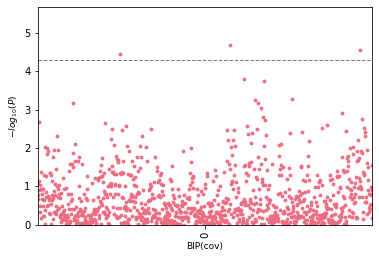

In [22]:
visuz.marker.mhat(df=df, axlabelfontname='DejaVu Sans', axxlabel=figname, 
                      figname= './plots/figname', chr='chr',
                      pv='P', show = True, axtickfontsize=5,
                      gwas_sign_line=True, gwasp=0.05/len(df))